In [1]:
## Import libraries/packages
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.max_open_warning'] = False

# Table of Contents
---
- <a href='#import_data'>Import Data</a>
- <a href='#duplicates'>Duplicates</a>
- <a href='#missing_values'>Missing Values</a>
- <a href='#outliers'>Outliers</a>
- <a href='#pca'>PCA</a>

# Import Data <a id = 'import_data'>
---

In [2]:
## Import data
df = pd.read_csv('churn_raw_data.csv', index_col=0).reset_index().drop('index', axis=1)

In [3]:
df.Outage_sec_perweek

0        6.972566
1       12.014541
2       10.245616
3       15.206193
4        8.960316
          ...    
9995     9.265392
9996     8.115849
9997     4.837696
9998    12.076460
9999    12.641760
Name: Outage_sec_perweek, Length: 10000, dtype: float64

In [4]:
## Examine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
## Rename survey columns
df.rename({
    'item1':'timely_response',
    'item2':'timely_fixes',
    'item3':'timely_replacements',
    'item4':'reliability',
    'item5':'options',
    'item6':'respectful_response',
    'item7':'courteous_exchange',
    'item8':'active_listening'
}, axis=1, inplace=True)

In [7]:
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


# Duplicates <a id='duplicates'>
---

## Detect

In [8]:
print(df.duplicated().value_counts())

False    10000
dtype: int64


## Treatment

No duplicate values to drop, no treatment needed.

# Missing Values <a id='missing_values'>
---

## Detect

In [9]:
## Count all null values
df.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [10]:
def var_hist(var, i):
    ax[i].hist(df[var])
    ax[i].set_title(var)

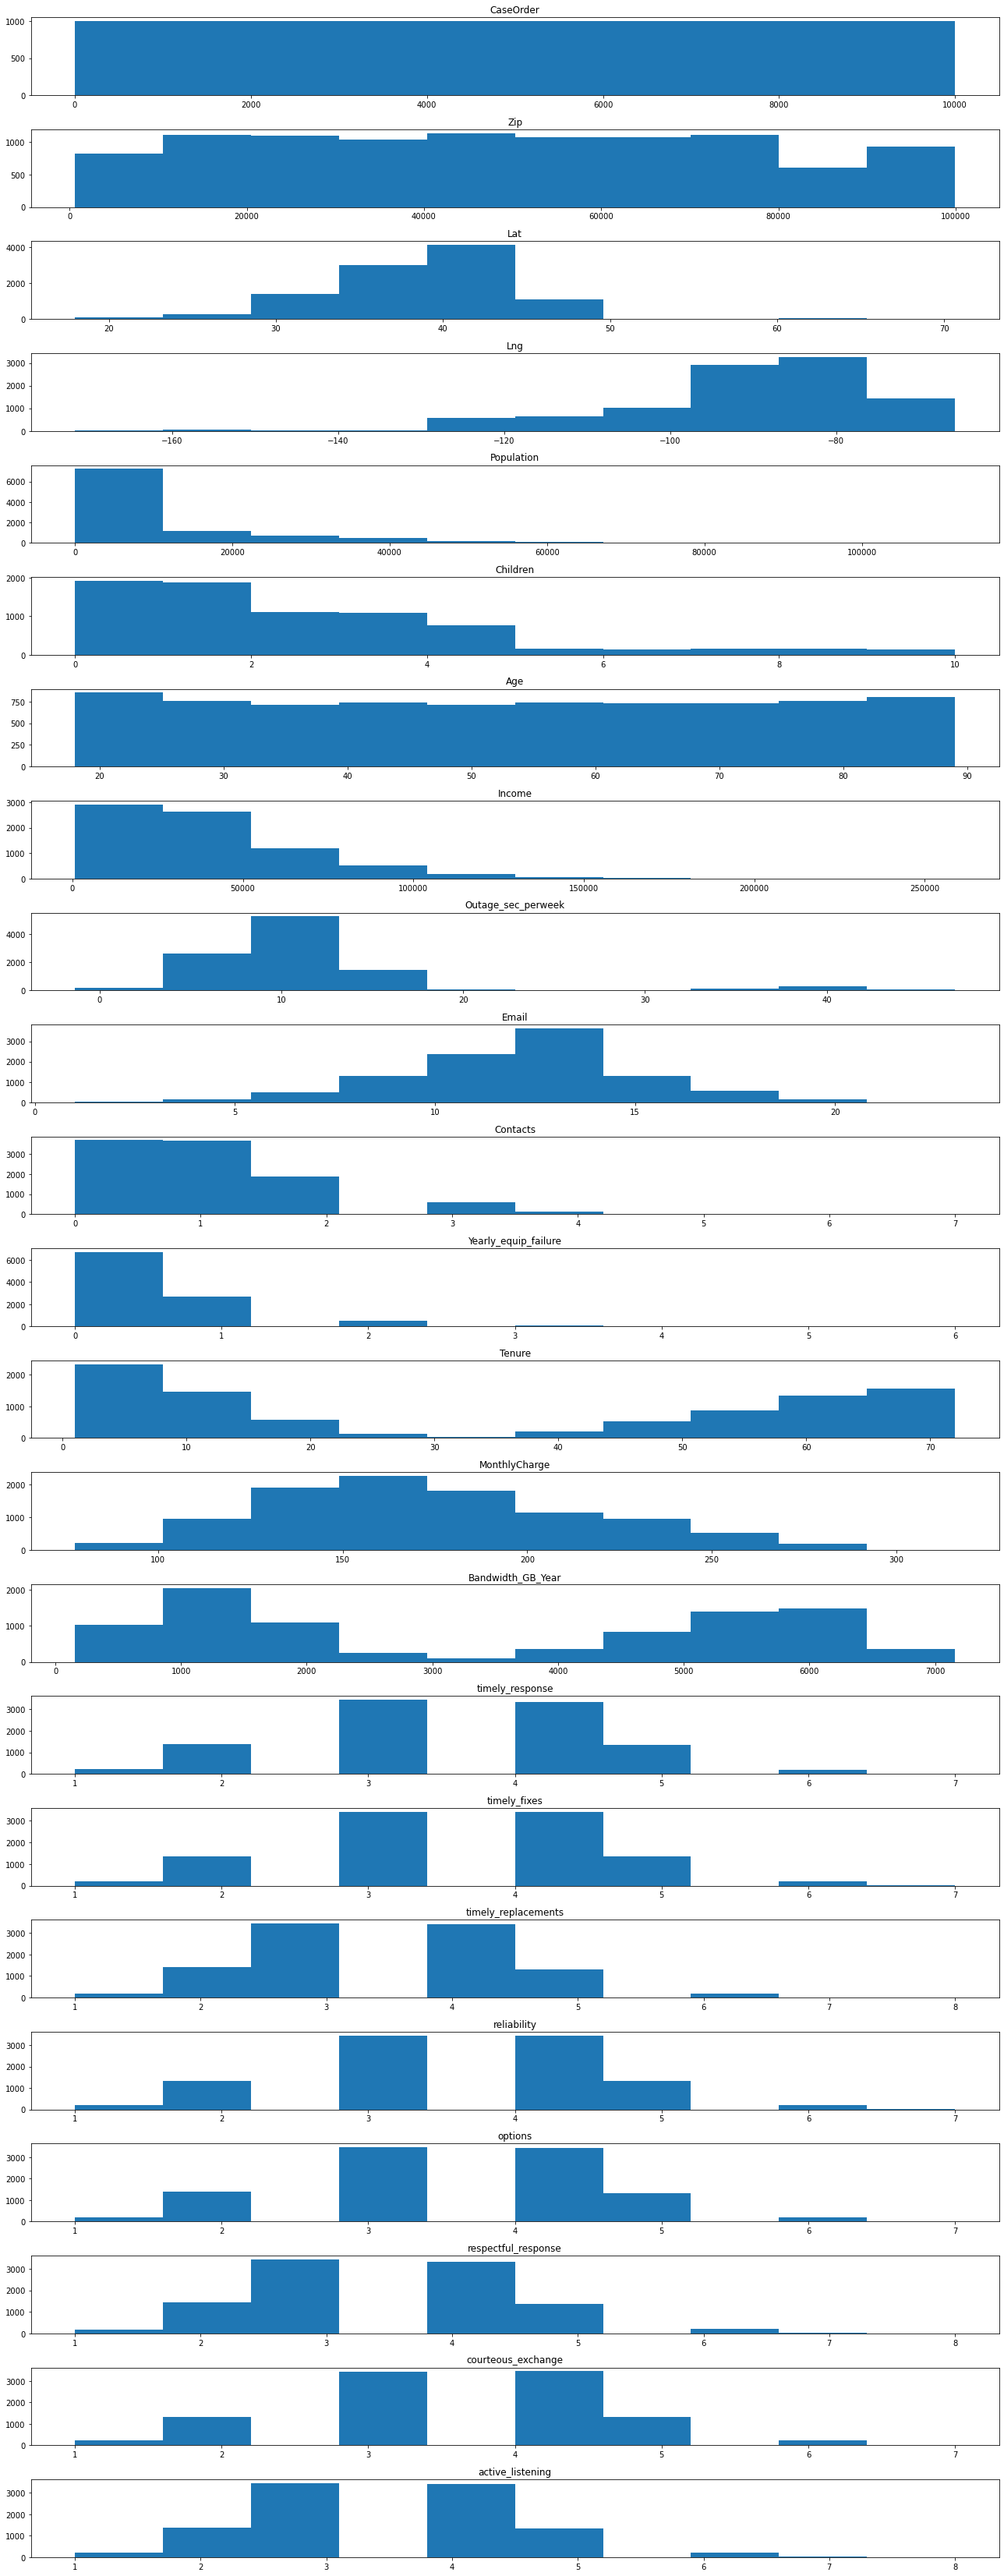

In [11]:
## View distribution
i = 0
fig, ax = plt.subplots(23)
fig.set_size_inches(18, 46)
for col in df.columns:
    if df[col].dtype != object:
        var_hist(col, i)
        i+=1
plt.tight_layout()

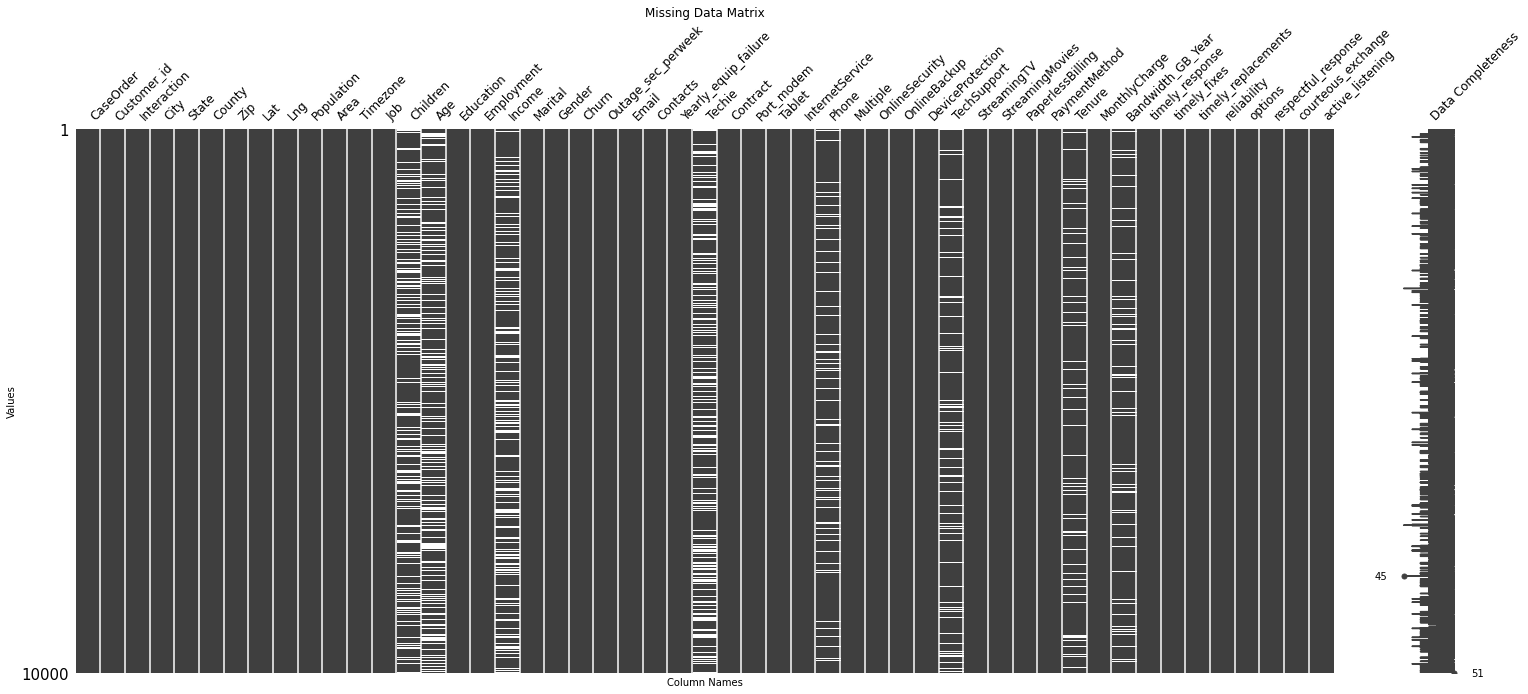

In [12]:
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing Data Matrix')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.show()

## Treatment

In [13]:
## Impute missing values with median (skewed/bi-modally distributed variables)
cols = ['Children', 'Income', 'Tenure', 'Bandwidth_GB_Year']
for col in cols:
    print(col + ': ', df[col].median())
    df[col].fillna(df[col].median(), inplace=True)
    print(col + ': ', df[col].median())

Children:  1.0
Children:  1.0
Income:  33186.785
Income:  33186.785
Tenure:  36.19603
Tenure:  36.19603
Bandwidth_GB_Year:  3382.424
Bandwidth_GB_Year:  3382.424


In [14]:
## Impute missing values with mean (uniformly distributed variables)
col = 'Age'
print(col + ': ', df[col].mean())
df[col].fillna(df[col].mean(), inplace=True)
print(col + ': ', df[col].mean())

Age:  53.27574750830565
Age:  53.27574750830906


In [15]:
## Impute missing values with mode (categorical variables)
cols = ['Techie', 'Phone', 'TechSupport']
for col in cols:
    print(col + ': ', df[col].mode()[0])
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(col + ': ', df[col].mode()[0])

Techie:  No
Techie:  No
Phone:  Yes
Phone:  Yes
TechSupport:  No
TechSupport:  No


In [16]:
## Verify all values were imputed
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

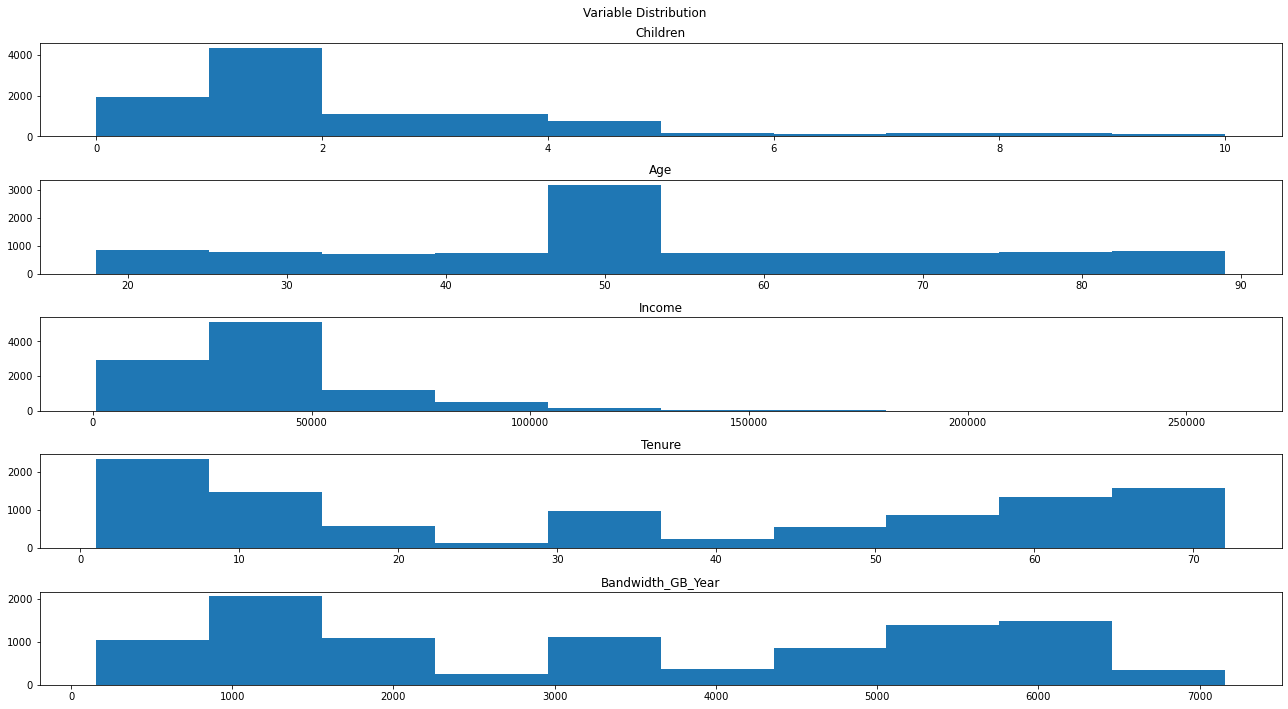

In [17]:
## Review distribution
fig, ax = plt.subplots(5)
fig.suptitle('Variable Distribution')
ax[0].hist(df.Children)
ax[0].set_title('Children')
ax[1].hist(df.Age)
ax[1].set_title('Age')
ax[2].hist(df.Income)
ax[2].set_title('Income')
ax[3].hist(df.Tenure)
ax[3].set_title('Tenure')
ax[4].hist(df.Bandwidth_GB_Year)
ax[4].set_title('Bandwidth_GB_Year')
plt.tight_layout()

# Outliers <a id='outliers'>
---

## Detect

In [18]:
## Assign zscores
for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        df['zscore_' + col] = zscore(df[col])

In [19]:
## Identify outliers
outliers = pd.DataFrame(columns=df.columns)
for col in df.columns:
    if 'zscore' in col:
        outliers = pd.concat([outliers, df.query('' + col + ' > 3 | ' + col + ' < -3')])

In [20]:
## Review unique outlier values
for col in df.columns:
    if 'zscore' in col:
        temp = df.query('' + col + ' > 3 | ' + col + ' < -3')[col[7:]].sort_values()
        print(temp.value_counts())
        print(col[7:] + ' length:', len(temp))
        print(col[7:] + ' percent of values:', (len(temp)/len(df))*100, end='\n\n')

Series([], Name: CaseOrder, dtype: int64)
CaseOrder length: 0
CaseOrder percent of values: 0.0

Series([], Name: Zip, dtype: int64)
Zip length: 0
Zip percent of values: 0.0

70.64066    2
66.04305    2
56.25100    2
21.29398    2
21.30376    2
           ..
20.73387    1
20.72067    1
19.74520    1
19.60753    1
55.27154    1
Name: Lat, Length: 136, dtype: int64
Lat length: 151
Lat percent of values: 1.51

-151.00340    2
-165.59080    2
-155.21810    2
-157.86270    2
-159.93042    2
             ..
-158.10820    1
-158.11930    1
-158.15730    1
-158.41292    1
-143.07800    1
Name: Lng, Length: 97, dtype: int64
Lng length: 102
Lng percent of values: 1.02

73671     3
53364     3
54101     2
56308     2
55652     2
         ..
59482     1
59556     1
59586     1
59607     1
111850    1
Name: Population, Length: 191, dtype: int64
Population length: 219
Population percent of values: 2.19

8.0     158
10.0     74
9.0      70
Name: Children, dtype: int64
Children length: 302
Children per

In [21]:
outliers

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,zscore_MonthlyCharge,zscore_Bandwidth_GB_Year,zscore_timely_response,zscore_timely_fixes,zscore_timely_replacements,zscore_reliability,zscore_options,zscore_respectful_response,zscore_courteous_exchange,zscore_active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,...,-0.060613,-1.20265,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
11,12,E243720,c32b8522-d62a-49b1-a77a-e0534cb1378b,Corozal,PR,Corozal,783,18.3041,-66.32847,33372,...,-0.593359,-1.069459,0.490679,0.478354,-0.47377,0.489878,0.494844,0.486389,-0.495406,0.490384
286,287,K905632,9e7b66b1-95b1-46ba-a7d6-8bdb3f1f8427,Hauula,HI,Honolulu,96717,21.55604,-157.89624,5148,...,-0.321153,-1.160281,-0.472948,-0.488213,1.471896,1.464761,-1.456817,0.486389,0.476931,1.462596
298,299,O825386,ff4e5d18-ba80-4be8-a5c3-4f8b5d5dee66,Ocean View,HI,Hawaii,96737,19.07026,-155.77587,4926,...,-0.786353,-0.703148,-0.472948,-0.488213,0.499063,0.489878,0.494844,-0.481165,1.449268,1.462596
359,360,K473134,b3b09fa7-cdde-44d0-9695-e70f6ce4201b,Kapaa,HI,Kauai,96746,22.09268,-159.38128,19324,...,0.083093,-1.137274,-0.472948,-1.454781,-0.47377,-0.485004,1.470674,0.486389,-0.495406,0.490384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,5337,L568891,738cc270-cb34-47a4-b79c-832e638c5c83,Edna,KS,Labette,67342,37.05928,-95.35755,870,...,-0.594582,1.058456,1.454307,1.444922,0.499063,0.489878,0.494844,0.486389,1.449268,3.407021
5574,5575,A132981,4fe1b3a2-688f-4f6a-a8b4-04386385ac29,Houston,TX,Harris,77051,29.6562,-95.38015,17052,...,-0.25743,1.166976,1.454307,0.478354,1.471896,0.489878,-0.480987,0.486389,1.449268,3.407021
7017,7018,O162736,c5ebab3f-fc50-4a79-94e2-09e7f6acaae8,Cameron,MO,Caldwell,64429,39.73473,-94.22787,13168,...,-1.119155,0.783914,1.454307,0.478354,0.499063,2.439643,-2.432648,3.389051,0.476931,3.407021
7840,7841,Q61916,5a4f0b67-bd27-4d58-8c3b-67da676b2de6,Stanhope,IA,Hamilton,50246,42.27537,-93.78216,613,...,0.691083,0.217097,1.454307,2.411489,1.471896,1.464761,-0.480987,2.421497,1.449268,3.407021


In [22]:
## Separate values from outliers
no_outliers = df.drop(outliers.index)

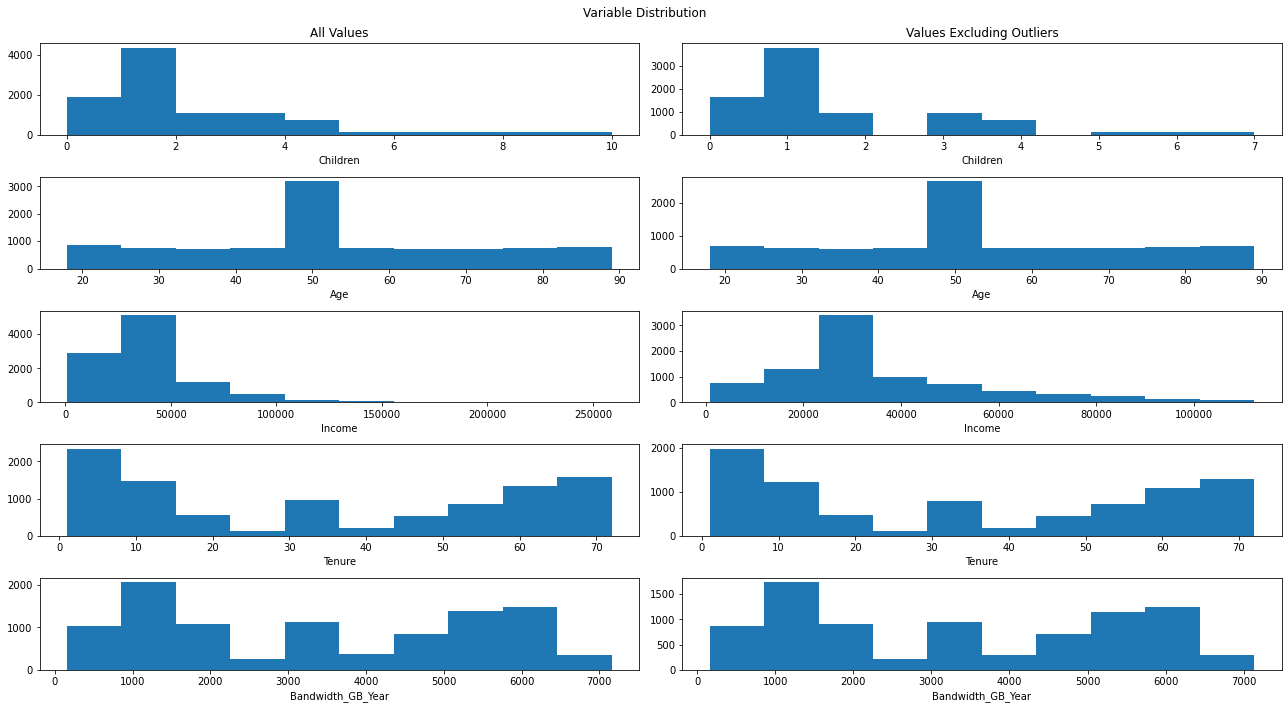

In [23]:
## Review distribution with and without outliers
fig, ax = plt.subplots(5, 2)
fig.suptitle('Variable Distribution')
ax[0,0].hist(df.Children)
ax[0,0].set_title('All Values')
ax[0,0].set_xlabel('Children')
ax[0,1].hist(no_outliers.Children)
ax[0,1].set_title('Values Excluding Outliers')
ax[0,1].set_xlabel('Children')
ax[1,0].hist(df.Age)
ax[1,0].set_xlabel('Age')
ax[1,1].hist(no_outliers.Age)
ax[1,1].set_xlabel('Age')
ax[2,0].hist(df.Income)
ax[2,0].set_xlabel('Income')
ax[2,1].hist(no_outliers.Income)
ax[2,1].set_xlabel('Income')
ax[3,0].hist(df.Tenure)
ax[3,0].set_xlabel('Tenure')
ax[3,1].hist(no_outliers.Tenure)
ax[3,1].set_xlabel('Tenure')
ax[4,0].hist(df.Bandwidth_GB_Year)
ax[4,0].set_xlabel('Bandwidth_GB_Year')
ax[4,1].hist(no_outliers.Bandwidth_GB_Year)
ax[4,1].set_xlabel('Bandwidth_GB_Year')
plt.tight_layout()

## Treatment

No treatment necessary as the detected outliers do not seem to be erroneous values and removing them would not cause any significant shift in distribution.

---

In [24]:
for col in df.columns:
    if 'zscore' in col:
        df.drop(col, axis=1, inplace=True)

In [25]:
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [26]:
df.to_csv('cleaned_data.csv')

# PCA <a id='pca'>
---

In [27]:
df1 = pd.read_csv('cleaned_data.csv', index_col=0).reset_index().drop('index', axis=1)

In [28]:
df1.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


## Re-expression of Categorical Variables

In [29]:
## View unique values of categorical variables
for col in df1.columns:
    if df1[col].dtype == object:
        print(col + ':')
        print(df1[col].unique())
        print(len(df1[col].unique()), 'unique values\n')

Customer_id:
['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
10000 unique values

Interaction:
['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
10000 unique values

City:
['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
6058 unique values

State:
['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 'NV']
52 unique values

County:
['Prince of Wales-Hyder' 'Ogemaw' 'Yamhill' ... 'Billings' 'Haralson'
 'Briscoe']
1620 unique values

Area:
['Urban' 'Suburban' 'Rural']
3 unique values

Timezone:
['America/Sitka' 'America/Detroit' 'America/Los_An

In [30]:
## Create dictionary assigning values
ordinal_dict = {
    'Education': {
        'No Schooling Completed':0,
        'Nursery School to 8th Grade':8,
        '9th Grade to 12th Grade, No Diploma':9,
        'GED or Alternative Credential':10,
        'Regular High School Diploma':11,
        'Professional School Degree':12,
        'Some College, Less than 1 Year':13,
        'Some College, 1 or More Years, No Degree':14,
        'Associate\'s Degree':15,
        'Bachelor\'s Degree':16,
        'Master\'s Degree':18,
        'Doctorate Degree':20
    }, 
    'Contract': {
        'Month-to-month':0, 
        'One year':1, 
        'Two Year': 2
    },
    'no_yes': {
        'No':0,
        'Yes':1
    }
}
area = [['Urban', 1], ['Suburban', 2], ['Rural', 3]]

In [31]:
## Create dummy columns for categorical variables
exclusions = [
    'CaseOrder',
    'Customer_id',
    'Interaction',
    'City',
    'State',
    'Country',
    'Lat',
    'Lng',
    'Timezone',
    'Churn'
]
nominal = [
    'Customer_id', 
    'Interaction', 
    'City', 
    'State', 
    'County', 
    'Timezone', 
    'Job', 
    'Marital',
]
ordinal = [
    'Education', 
    'Contract',
    'Techie', 
    'Port_modem', 
    'Tablet', 
    'Phone', 
    'Multiple', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies', 
    'PaperlessBilling',
    'Churn'
]
one_hot = [
    'Area', 
    'Employment', 
    'Gender', 
    'InternetService', 
    'PaymentMethod'
]

le = LabelEncoder()

for col in df1.columns:
    if col in exclusions or col in nominal or col in one_hot:
        df1.drop(col, axis=1, inplace=True)
    elif col in ordinal:
        if col == 'Education' or col == 'Contract':
            df1.replace(ordinal_dict[col], inplace=True)
        else:
            df1.replace(ordinal_dict['no_yes'], inplace=True)
    else:
        continue

In [32]:
pca_cols = [
    'Population',
    'Children',
    'Age',
    'Income',
    'Outage_sec_perweek',
    'Email',
    'Contacts',
    'Yearly_equip_failure',
    'Tenure',
    'MonthlyCharge',
    'Bandwidth_GB_Year'
]

In [33]:
pca_df = df[pca_cols]

In [34]:
pca_df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,1.0,68.0,28561.990,6.972566,10,0,1,6.795513,171.449762,904.536110
1,10446,1.0,27.0,21704.770,12.014541,12,0,1,1.156681,242.948015,800.982766
2,3735,4.0,50.0,33186.785,10.245616,9,0,1,15.754144,159.440398,2054.706961
3,13863,1.0,48.0,18925.230,15.206193,15,2,0,17.087227,120.249493,2164.579412
4,11352,0.0,83.0,40074.190,8.960316,16,2,1,1.670972,150.761216,271.493436


## Standardize Data

In [35]:
## Center data around a zero mean
centered = pca_df.apply(lambda x: x-x.mean())

In [36]:
centered.head(3)

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-9718.5624,-0.8225,14.724252,-9694.027897,-4.480389,-2.016,-0.9942,0.602,-27.861351,-2.626543,-2492.630287
1,689.4376,-0.8225,-26.275748,-16551.247897,0.561586,-0.016,-0.9942,0.602,-33.500183,68.871710,-2596.183631
2,-6021.5624,2.1775,-3.275748,-5069.232897,-1.207339,-3.016,-0.9942,0.602,-18.902720,-14.635907,-1342.459436


In [37]:
## Standardize data to be on the same scale
zscores = zscore(centered)

In [38]:
zscores.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.427079,0.817916,-0.391731,-0.637726,-0.666282,-1.005852,0.946658,-1.106419,-0.060613,-1.202650
1,0.047772,-0.427079,-1.459588,-0.668828,0.079935,-0.005288,-1.005852,0.946658,-1.330346,1.589348,-1.252613
2,-0.417238,1.130655,-0.181964,-0.204845,-0.171849,-0.996779,-1.005852,0.946658,-0.750657,-0.337752,-0.647713
3,0.284537,-0.427079,-0.293062,-0.781148,0.534225,0.986203,1.017588,-0.625864,-0.697719,-1.242158,-0.594701
4,0.110549,-0.946323,1.651149,0.073471,-0.354795,1.316700,1.017588,0.946658,-1.309923,-0.538041,-1.508082


## Perform PCA

In [39]:
pca = PCA(n_components=11)

In [40]:
pca = pca.fit(zscores)

In [41]:
## Create column labels
pc_cols = []
for i in range(len(zscores.columns)):
    pc_cols.append('PC' + str(i+1))

In [42]:
## Get principal component variance
variance = pd.DataFrame(pca.explained_variance_ratio_, index=pc_cols, columns=['variance_ratio']).transpose()

In [43]:
variance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variance_ratio,0.17245,0.1029,0.095265,0.093003,0.091264,0.090532,0.089832,0.089227,0.087505,0.078653,0.009369


In [44]:
## View principal component loadings
loadings = pd.DataFrame(pca.components_, index=pca_df.columns, columns=pc_cols)

In [45]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.000410,-0.001876,-0.012267,0.006198,0.022597,-0.021291,0.004537,0.015837,0.704917,0.045223,0.706838
Children,-0.055144,0.023430,-0.047665,-0.004274,0.706395,0.057725,-0.007793,0.058193,-0.058210,0.696327,-0.009356
Age,-0.317635,0.553952,-0.362835,0.242582,0.021588,-0.336139,-0.433136,0.302881,-0.018146,-0.092825,0.002078
Income,-0.384314,-0.201651,0.520750,0.176956,-0.010086,-0.525970,0.329767,0.348825,-0.004487,0.040855,-0.016865
Outage_sec_perweek,-0.038206,0.051537,-0.103670,0.767615,0.014752,-0.058629,0.248663,-0.573845,-0.003246,0.033243,0.001718
Email,0.659805,0.207991,0.198053,0.415412,0.057735,0.169178,0.092719,0.515929,-0.000755,-0.053430,-0.004004
Contacts,0.431825,-0.491198,-0.443304,-0.003951,0.052749,-0.603274,-0.087308,0.027852,-0.018042,0.011890,-0.011402
Yearly_equip_failure,-0.054080,0.258891,-0.477952,-0.211643,0.015576,-0.002957,0.789294,0.168915,-0.015835,-0.069105,0.004992
Tenure,-0.349526,-0.545223,-0.323598,0.313605,0.051933,0.455452,-0.049867,0.376616,0.010936,-0.151217,-0.007306
MonthlyCharge,0.000900,0.009899,0.120987,-0.069471,0.700467,-0.055727,0.005655,-0.127722,0.038102,-0.684630,-0.012708


In [46]:
## Get eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(pca.get_covariance(), eigenvector)) for eigenvector in pca.components_]

In [47]:
eigenvalues

[1.8971364439308465,
 1.1320103793019345,
 1.0480201905775954,
 1.0231331581767409,
 1.0040048289771741,
 0.9959559667493875,
 0.9882479899374739,
 0.9815899066700934,
 0.9626564887406046,
 0.8652730395682287,
 0.10307171738093451]

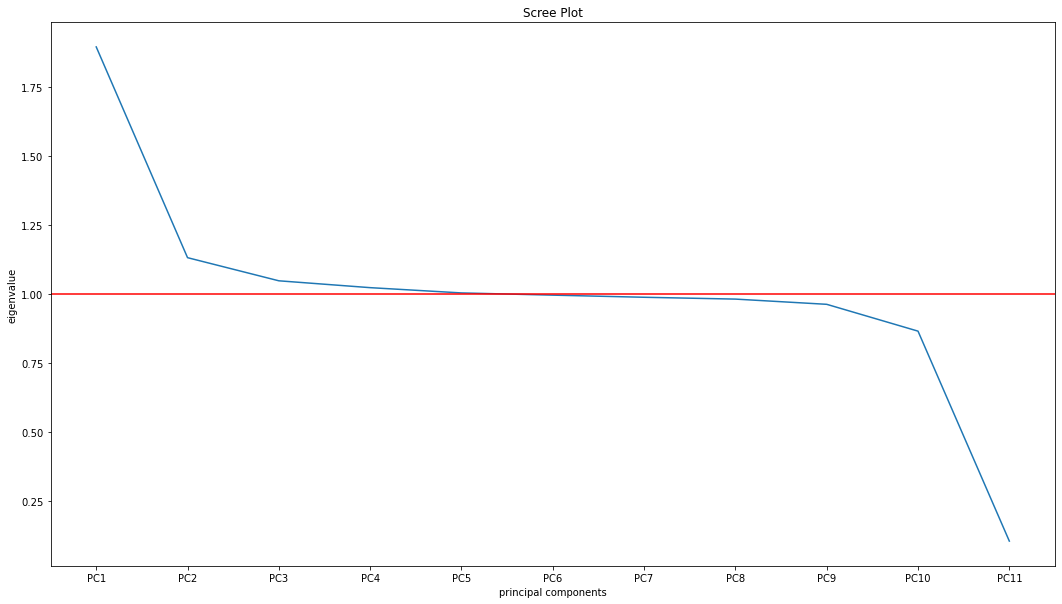

In [48]:
ticks = range(len(pca_cols))
plt.plot(ticks, eigenvalues)
plt.title('Scree Plot')
plt.xticks(ticks, pc_cols)
plt.xlabel('principal components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color = 'r')
plt.show()